# Early Stopping in Practice

This is a notebook for the medium article [Early Stopping in Practice](https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

In [5]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [7]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [10]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

## Build a neural network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [25]:
model = create_model()

In [26]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 1s - loss: 1.0901 - accuracy: 0.3214 - val_loss: 1.0210 - val_accuracy: 0.7143
Epoch 2/200
84/84 - 0s - loss: 1.0163 - accuracy: 0.6905 - val_loss: 0.9427 - val_accuracy: 0.7143
Epoch 3/200
84/84 - 0s - loss: 0.9271 - accuracy: 0.7024 - val_loss: 0.8496 - val_accuracy: 0.7143
Epoch 4/200
84/84 - 0s - loss: 0.8421 - accuracy: 0.6786 - val_loss: 0.7493 - val_accuracy: 0.7143
Epoch 5/200
84/84 - 0s - loss: 0.7361 - accuracy: 0.7262 - val_loss: 0.6540 - val_accuracy: 0.8214
Epoch 6/200
84/84 - 0s - loss: 0.6338 - accuracy: 0.8690 - val_loss: 0.5392 - val_accuracy: 0.8214
Epoch 7/200
84/84 - 0s - loss: 0.5411 - accuracy: 0.6905 - val_loss: 0.4829 - val_accuracy: 0.7143
Epoch 8/200
84/84 - 0s - loss: 0.4804 - accuracy: 0.6786 - val_loss: 0.4137 - val_accuracy: 0.7500
Epoch 9/200
84/84 - 0s - loss: 0.3993 - accuracy: 0.7619 - val_loss: 0.3541 - val_accuracy: 0.9286
Epoch 10/200
84/84 - 0s - loss: 0.3421 - accuracy: 0.9762 - val_l

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

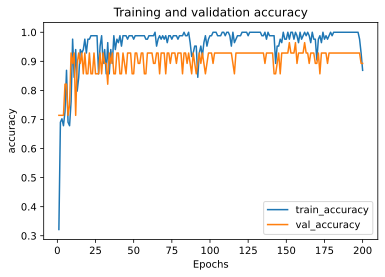

In [30]:
plot_metric(history, 'accuracy')

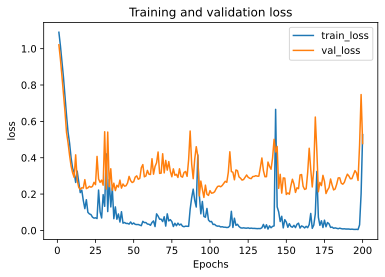

In [31]:
plot_metric(history, 'loss')

### EarlyStopping() with default settings

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

In [35]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.0549 - accuracy: 0.9762 - val_loss: 0.2758 - val_accuracy: 0.9286
Epoch 2/200
84/84 - 0s - loss: 0.0752 - accuracy: 0.9643 - val_loss: 0.2399 - val_accuracy: 0.9286
Epoch 3/200
84/84 - 0s - loss: 0.0417 - accuracy: 0.9881 - val_loss: 0.1848 - val_accuracy: 0.9286
Epoch 4/200
84/84 - 0s - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.1790 - val_accuracy: 0.9286
Epoch 5/200
84/84 - 0s - loss: 0.0399 - accuracy: 0.9762 - val_loss: 0.1773 - val_accuracy: 0.9643
Epoch 6/200
84/84 - 0s - loss: 0.0290 - accuracy: 0.9881 - val_loss: 0.2036 - val_accuracy: 0.9286


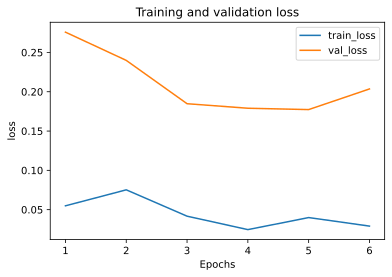

In [36]:
plot_metric(history, 'loss')

### Customizing Early Stopping

In [37]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [38]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.2464 - val_accuracy: 0.9286
Epoch 2/200
84/84 - 0s - loss: 0.0253 - accuracy: 0.9881 - val_loss: 0.2413 - val_accuracy: 0.9286
Epoch 3/200
84/84 - 0s - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.2083 - val_accuracy: 0.9286
Epoch 4/200
84/84 - 0s - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2026 - val_accuracy: 0.9286
Epoch 5/200
84/84 - 0s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2169 - val_accuracy: 0.9286
Epoch 6/200
84/84 - 0s - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.9286
Epoch 7/200
84/84 - 0s - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.2882 - val_accuracy: 0.9286
Epoch 8/200
84/84 - 0s - loss: 0.0376 - accuracy: 0.9762 - val_loss: 0.4433 - val_accuracy: 0.8571
Epoch 9/200
84/84 - 0s - loss: 0.1473 - accuracy: 0.9524 - val_loss: 0.3199 - val_accuracy: 0.8929


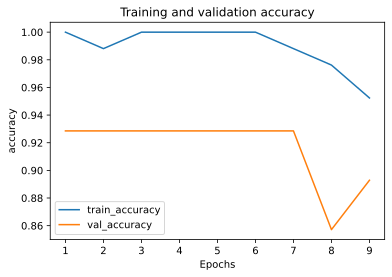

In [39]:
plot_metric(history, 'accuracy')